In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd

In [59]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [61]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [62]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [63]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])
    
  


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [67]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date

('2017-08-23')

In [68]:
for date in last_date:
    sep_date=date.split('-')   
sep_date

['2017', '08', '23']

In [69]:
year=int(sep_date[0]); 
month=int(sep_date[1]); 
day=int(sep_date[2]);

first_date = dt.date(year, month, day) - dt.timedelta(days=365)

first_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores

precip_year = session.query(Measurement.date, Measurement.prcp).\
filter(func.strftime(Measurement.date)>= first_date).\
order_by(Measurement.date).all()

precip_year



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precip_year = pd.DataFrame(precip_year, columns = ['Date','Precipitation'])
df_precip_year.set_index('Date', inplace = True)
# Sort the dataframe by date

df_precip_year



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


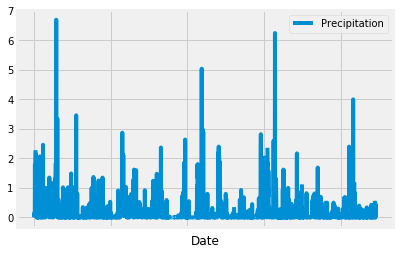

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precip_year.plot()

# Show the Figure
plt.show()

In [17]:
df_precip_year.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])




id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
num_stations = session.query(Station.station).count()
num_stations

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.

station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

temp_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

# highest temperature recorded, and average temperature most active station?
most_station = temp_data[0]


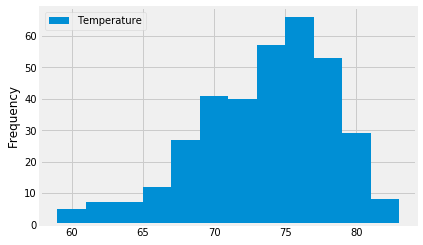

In [22]:
# Choose the station with the highest number of temperature observations.


temp_by_stat= session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_station).\
filter(func.strftime(Measurement.date)>= first_date).\
order_by(Measurement.date).all()


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_temp_by_stat = pd.DataFrame(temp_by_stat, columns =['Date', 'Temperature'])
df_temp_by_stat.set_index('Date', inplace = True)
df_temp_by_stat
df_temp_by_stat.plot.hist(bins=12)
plt.show()





In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))



[(62.0, 69.57142857142857, 74.0)]


In [43]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = dt.strptime(start_date, '%Y-%m-%d')

start_date



AttributeError: module 'datetime' has no attribute 'strptime'

In [ ]:
year1=int(sep_date1[0]); 
month1=int(sep_date1[1]); 
day1=int(sep_date1[2]);
year2=int(sep_date2[0]); 
month2=int(sep_date2[1]); 
day2=int(sep_date2[2]);

start_date_yr = start_date - dt.timedelta(days=365)
end_date_yr = dt.date(year2, month2, day2) - dt.timedelta(days=365)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
